# Example: Compare distributions for common particles in two models

In this example, we generate the pseudorapidity and Feynman-x distributions for selected particles in two models and compare them visually.

Requires extra packages: matplotlib, tqdm, boost-histogram, particle, joblib

In [1]:
import matplotlib.pyplot as plt
import boost_histogram as bh
from tqdm import tqdm
from particle import literals as lp, Particle
import joblib  # only joblib works reliably in notebooks

from impy.constants import TeV
from impy.kinematics import EventKinematics
import impy.models as im

In [2]:
# We want to simulate pp interactions at 1 TeV center-of-mass

# The event kinematics objects defines the collision and its frame.
# Here we want pp collisions at 1 TeV center-of-mass energy.
event_kinematics = EventKinematics(
    ecm= 1 * TeV,
    particle1=lp.proton.pdgid,
    particle2=lp.proton.pdgid
)

# How many events to generate
n_events = 10000

In [3]:
pid_axis = bh.axis.IntCategory([
    x.pdgid for x in (lp.pi_0, lp.pi_plus, lp.pi_minus, lp.K_plus, lp.K_minus, lp.proton, lp.antiproton)
])

models = [
    im.Sibyll21,
    im.Sibyll23d,
    im.QGSJet01c,
    im.QGSJetII04,
    im.Pythia6,
]

@joblib.delayed
def run(Model):    
    # Create mode instance here.
    # This typically generates a banner for each model.
    # Models can only be created once.

    m = Model(event_kinematics)
    m.set_stable(lp.pi_0.pdgid, True)

    # Histogram for Feynman-x distributions
    hx = bh.Histogram(pid_axis, bh.axis.Regular(30, -1, 1))

    # Histogram for pseudorapidity distributions
    heta = bh.Histogram(pid_axis, bh.axis.Regular(30, -7, 7))

    for event in tqdm(m(n_events), total=n_events):
        event = event.final_state() # select only final state particles
        hx.fill(event.pid, event.xf)
        heta.fill(event.pid, event.eta)

    return m.label, hx, heta

with joblib.Parallel(n_jobs=10, batch_size=1) as pool:
    results = pool(run(m) for m in models)

results = {label: rest for (label, *rest) in results}


 |                                                  |
 |                 S I B Y L L  2.1                 |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |                   Ralph ENGEL                    |
 |           R.S. FLETCHER, T.K. GAISSER            |
 |               P. LIPARI, T. STANEV               |
 |                                                  |
 | Publication to be cited when using this program: |
 | R. Engel et al., Proc. 26th ICRC, 1 (1999) 415   |
 |                                                  |
 | last modified:  28. Sept. 2001 by R. Engel       |


 Table: J, sqs,  PT_cut,  SIG_tot,  SIG_inel,  B_el,  rho,  <n_s>,  <n_h>
 ------------------------------------------------------------------------
    1   1.000E+01    1.45   38.33   30.88   10.83  -0.185   1.964   0.003
    1   1.259E+01    1.49   38.27   31.16   11.10  -0.127   1.949   0.006


  1%|          | 64/10000 [00:00<00:15, 636.59it/s]s]

    1   3.162E+03    3.41   89.95   68.24   18.10   0.124   1.175   2.055
    1   3.981E+03    3.54   95.02   71.38   18.51   0.124   1.135   2.312
    1   5.012E+03    3.67  100.35   74.64   18.95   0.124   1.096   2.594
    1   6.310E+03    3.81  105.95   78.03   19.40   0.124   1.059   2.903
    1   7.943E+03    3.95  111.81   81.53   19.88   0.124   1.024   3.244
    1   1.000E+04    4.09  117.90   85.14   20.38   0.125   0.990   3.618
    1   1.259E+04    4.25  124.23   88.85   20.90   0.125   0.959   4.030
    1   1.585E+04    4.40  130.77   92.65   21.44   0.125   0.928   4.481
    1   1.995E+04    4.57  137.51   96.55   22.01   0.125   0.898   4.957
    1   2.512E+04    4.74  144.44  100.54   22.60   0.125   0.865   5.394
    1   3.162E+04    4.91  151.56  104.61   23.21   0.125   0.825   5.707
    1   3.981E+04    5.09  158.85  108.75   23.85   0.125   0.779   5.909
    1   5.012E+04    5.28  166.31  112.98   24.50   0.125   0.733   6.076
    1   6.310E+04    5.47  173.92  117

  2%|▏         | 194/10000 [00:00<00:15, 635.98it/s]s]

    1   7.943E+05    8.08  266.48  168.59   33.72   0.125   0.364   8.364
    1   1.000E+06    8.37  275.56  173.57   34.59   0.125   0.343   8.442
    1   1.259E+06    8.67  284.75  178.60   35.47   0.125   0.324   8.517
    1   1.585E+06    8.97  294.03  183.68   36.36   0.125   0.307   8.590
    1   1.995E+06    9.28  303.40  188.80   37.27   0.125   0.290   8.663
    1   2.512E+06    9.61  312.87  193.97   38.18   0.125   0.274   8.735
    1   3.162E+06    9.94  322.42  199.18   39.11   0.125   0.259   8.808
    1   3.981E+06   10.29  332.06  204.43   40.05   0.125   0.246   8.882
 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
    1   5.012E+06   10.64  341.79  209.72   41.00   0.125   0.233   8.957
    1   6.310E+06   11.00  351.59  215.05   41.95   0.125   0.220   9.032
    1   7.943E+06   11.38  361.49  220.42   42.92   0.125   0.209   9.101
    1   1.000E+07   11.77  371.46  225.83   43.90   0.125   0.198   9.158

 Table: J, sqs,  PT_cut,  SIG_tot,  SIG_

 23%|██▎       | 2327/10000 [00:00<00:02, 3348.07it/s]

    2   1.585E+01    1.54   23.49   20.57   10.42  -0.001   1.807   0.026
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
    2   1.995E+01    1.59   23.87   21.00   10.56   0.024   1.783   0.040
    2   2.512E+01    1.64   24.33   21.49   10.70   0.045   1.756   0.058
    2   3.162E+01    1.69   24.89   21.95   10.84   0.061   1.727   0.081
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..
    2   3.981E+01    1.75   25.53   22.48   10.97   0.074   1.695   0.110
    2   5.012E+01    1.81   26.25   23.06   11.11   0.085   1.659   0.144
    2   6.310E+01    1.87   27.04   23.69   11.24   0.093   1.621   0.185
    2   7.943E+01    1.93   27.89   24.36   11.37   0.100   1.580   0.233
    2   1.000E+02    2.00   28.80   25.08   11.50   0.105   1.536   0.288
    2   1.259E+02    2.07   29.72   25.72   11.44   0.109   1.490   0.351
    2   1.585E+02    2.14   30.77   26.45   11.39   0.113   1.442   0.423
    2   1.995E+02    2.22   31.96   27.30   

  0%|          | 0/10000 [00:00<?, ?it/s]/Users/hdembinski/Extern/impy/src/impy/common.py:155: RuntimeWarning: invalid value encountered in true_divide
  return np.log((self.p_tot + self.pz) / self.pt)
 31%|███       | 3073/10000 [00:00<00:01, 3467.81it/s]

    2   2.512E+03    3.29   63.55   49.12   13.97   0.124   0.859   2.072
    2   3.162E+03    3.41   67.83   51.93   14.39   0.124   0.821   2.298
    2   3.981E+03    3.54   72.35   54.85   14.83   0.124   0.785   2.543
    2   5.012E+03    3.67   77.09   57.87   15.28   0.124   0.752   2.809
    2   6.310E+03    3.81   82.06   61.01   15.75   0.124   0.720   3.099
    2   7.943E+03    3.95   87.24   64.23   16.24   0.125   0.691   3.416
    2   1.000E+04    4.09   92.61   67.55   16.74   0.125   0.664   3.761
    2   1.259E+04    4.25   98.18   70.96   17.26   0.125   0.638   4.138
    2   1.585E+04    4.40  103.94   74.44   17.79   0.125   0.614   4.543
    2   1.995E+04    4.57  109.87   78.01   18.34   0.125   0.591   4.953
    2   2.512E+04    4.74  115.96   81.65   18.91   0.125   0.565   5.303
    2   3.162E+04    4.91  122.21   85.36   19.50   0.125   0.535   5.552
    2   3.981E+04    5.09  128.62   89.15   20.10   0.125   0.504   5.737
    2   5.012E+04    5.28  135.18   92

  9%|▊         | 867/10000 [00:00<00:03, 2466.38it/s]]

    2   5.012E+05    7.54  207.88  134.69   27.68   0.125   0.261   7.792
    2   6.310E+05    7.81  215.78  139.15   28.45   0.125   0.246   7.909
    2   7.943E+05    8.08  223.78  143.66   29.23   0.125   0.232   8.004
    2   1.000E+06    8.37  231.89  148.21   30.02   0.125   0.219   8.090
    2   1.259E+06    8.67  240.09  152.81   30.83   0.125   0.207   8.172
    2   1.585E+06    8.97  248.39  157.46   31.64   0.125   0.196   8.249
    2   1.995E+06    9.28  256.79  162.15   32.47   0.125   0.185   8.324
    2   2.512E+06    9.61  265.28  166.88   33.30   0.125   0.175   8.398
    2   3.162E+06    9.94  273.86  171.66   34.15   0.125   0.165   8.470
    2   3.981E+06   10.29  282.53  176.48   35.01   0.125   0.156   8.542
    2   5.012E+06   10.64  291.29  181.34   35.88   0.125   0.148   8.615
    2   6.310E+06   11.00  300.14  186.25   36.76   0.125   0.140   8.687
    2   7.943E+06   11.38  309.08  191.19   37.64   0.125   0.133   8.756
    2   1.000E+07   11.77  318.10  196

 31%|███       | 3053/10000 [00:01<00:02, 2584.13it/s]/Users/hdembinski/Extern/impy/src/impy/common.py:155: RuntimeWarning: divide by zero encountered in true_divide
  return np.log((self.p_tot + self.pz) / self.pt)
 64%|██████▍   | 6404/10000 [00:07<00:03, 1178.32it/s]

 done
  qgaini: nuclear cross sections readout from the file sectnu-II-04


  1%|          | 118/10000 [00:00<00:08, 1161.87it/s]/Users/hdembinski/Extern/impy/src/impy/common.py:155: RuntimeWarning: invalid value encountered in true_divide
  return np.log((self.p_tot + self.pz) / self.pt)
/Users/hdembinski/Extern/impy/src/impy/common.py:155: RuntimeWarning: divide by zero encountered in true_divide
  return np.log((self.p_tot + self.pz) / self.pt)
100%|██████████| 10000/10000 [00:09<00:00, 1075.90it/s]


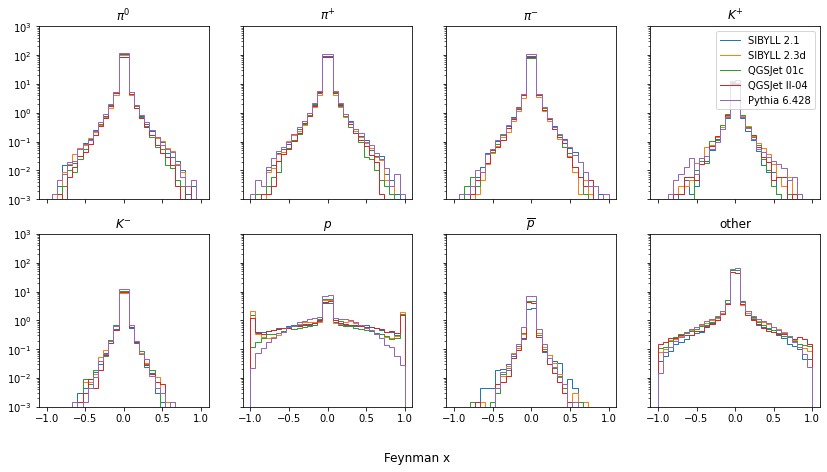

In [4]:
fig, ax = plt.subplots(2, 4, figsize=(14, 7), sharex=True, sharey=True)

# boost-histogram axes contain overflow bins to count everything else,
# we use this here to show a histogram of all other particles
labels = [f"${Particle.from_pdgid(pid).latex_name}$" for pid in pid_axis]
labels += ["other"]

for model, (hx, heta) in results.items():
    a = hx.axes[1]
    values = hx.values(True) # this returns the full histogram including overflow bins
    values = values[:, 1:-1] # strip the overflow bins from the second axis
    labels = [f"${Particle.from_pdgid(pid).latex_name}$" for pid in hx.axes[0]]
    labels += ["other"]
    for i, (label, axi) in enumerate(zip(labels, ax.flat)):
        axi.stairs(values[i] / n_events / a.widths, a.edges, label=model)
        axi.set_title(label)
plt.semilogy()
plt.ylim(1e-3, 1e3)
fig.supxlabel("Feynman x")
ax[0, -1].legend();

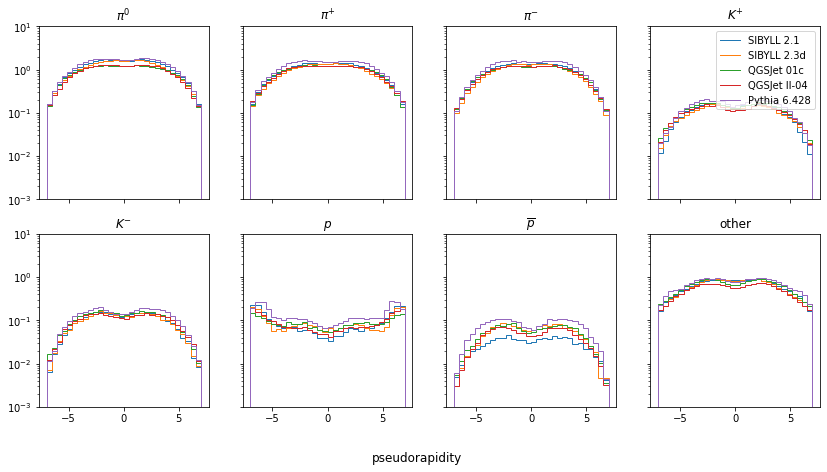

In [5]:
fig, ax = plt.subplots(2, 4, figsize=(14, 7), sharex=True, sharey=True)

for model, (hx, heta) in results.items():
    a = heta.axes[1]
    values = heta.values(True)
    values = values[:, 1:-1]
    for i, (label, axi) in enumerate(zip(labels, ax.flat)):
        axi.stairs(values[i] / n_events / a.widths, a.edges, label=model)
        axi.set_title(label)
plt.semilogy()
plt.ylim(1e-3, 1e1)
fig.supxlabel("pseudorapidity")
ax[0, -1].legend();